In [1]:
# importing packages
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, f1_score, confusion_matrix, precision_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, LeaveOneOut, KFold
from imblearn.over_sampling import SMOTE

In [ ]:
#Data
print(os.getcwd())

data_dir = os.getcwd() + "\\Kaggle\\Dataset_TBI.xlsx"
print(data_dir)

In [3]:
df_tbi = pd.read_excel(data_dir,index_col=0)
df_tbi.head()

,Age,Sex,Marshall (t0),Entry Diagnosis (t0),CRS-R (t1),RLAS (t1),DRS (t1),ERBI A (t1),ERBI B (t1),GOS-E (t1),Diagnosis at Discharge (t2),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2),GOS-E (t2)
Subject,,,,,,,,,,,,,,,,,
S1,76,M,V,MCS,10.0,3,18,-175,0,3,DEATH,NaN,NaN,30.0,NaN,NaN,1
S2,28,M,III,MCS,8.0,3,20,-125,0,2,EMERSION,23.0,7.0,8.0,0.0,60.0,4
S3,20,F,II,MCS,9.0,3,18,-175,0,2,EMERSION,23.0,7.0,6.0,0.0,70.0,4
S4,22,M,II,EMERSION,23.0,4,15,-175,0,3,EMERSION,23.0,7.0,3.0,0.0,100.0,7
S5,62,M,II,EMERSION,23.0,4,15,-100,5,3,EMERSION,23.0,6.0,10.0,-50.0,90.0,3


### Data exploration

In [4]:
df_tbi = pd.read_excel(data_dir)
df_tbi1 = df_tbi.drop("Subject", axis = 1)
df_tbi.info()
df_tbi.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Subject                      102 non-null    object 
 1   Age                          102 non-null    int64  
 2   Sex                          102 non-null    object 
 3   Marshall (t0)                99 non-null     object 
 4   Entry Diagnosis (t0)         102 non-null    object 
 5   CRS-R (t1)                   101 non-null    float64
 6   RLAS (t1)                    102 non-null    int64  
 7   DRS (t1)                     102 non-null    int64  
 8   ERBI A (t1)                  102 non-null    int64  
 9   ERBI B (t1)                  102 non-null    int64  
 10  GOS-E (t1)                   102 non-null    int64  
 11  Diagnosis at Discharge (t2)  102 non-null    object 
 12  CRS-R (t2)                   90 non-null     float64
 13  RLAS (t2)           

Index(['Subject', 'Age', 'Sex', 'Marshall (t0)', 'Entry Diagnosis (t0)',
       'CRS-R (t1)', 'RLAS (t1)', 'DRS (t1)', 'ERBI A (t1)', 'ERBI B (t1)',
       'GOS-E (t1)', 'Diagnosis at Discharge (t2)', 'CRS-R (t2)', 'RLAS (t2)',
       'DRS (t2)', 'ERBI A (t2)', 'ERBI B (t2)', 'GOS-E (t2)'],
      dtype='object')

In [5]:
null_df = pd.DataFrame(df_tbi.isnull().sum())
null_df[null_df[0]>0]

,0
Marshall (t0),3
CRS-R (t1),1
CRS-R (t2),12
RLAS (t2),12
DRS (t2),2
ERBI A (t2),12
ERBI B (t2),12


In [6]:
features = list(df_tbi_full.columns)
plt.figure(figsize=(30,25))
for i in range(18):
    plt.subplot(6, 3, i+1)
    plt.title(features[i])
    df_tbi[features[i]].hist()
plt.savefig('Histogram feature')

In [7]:
# from pandas.plotting import scatter_matrix
scatter_matrix(df_tbi_full, figsize=(25,25))

In [8]:
cor = df_tbi_full.corr()
plt.figure(figsize = (12,6))
sns.heatmap(cor, annot = True)
plt.savefig('Correlation feature')

## Data processing

### 4 class

In [9]:
df_tbi4 = df_tbi.copy()

In [10]:
df_tbi4['GOS-E (t2)'] = df_tbi4['GOS-E (t2)'].apply(lambda x: 1 if 1 <= x <= 2 else x)
df_tbi4['GOS-E (t2)'] = df_tbi4['GOS-E (t2)'].apply(lambda x: 3 if 3 <= x <= 4 else x)
df_tbi4['GOS-E (t2)'] = df_tbi4['GOS-E (t2)'].apply(lambda x: 2 if 5 <= x <= 6 else x)
df_tbi4['GOS-E (t2)'] = df_tbi4['GOS-E (t2)'].apply(lambda x: 4 if 7 <= x <= 8 else x)

In [11]:
df_tbi4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Subject                      102 non-null    object 
 1   Age                          102 non-null    int64  
 2   Sex                          102 non-null    object 
 3   Marshall (t0)                99 non-null     object 
 4   Entry Diagnosis (t0)         102 non-null    object 
 5   CRS-R (t1)                   101 non-null    float64
 6   RLAS (t1)                    102 non-null    int64  
 7   DRS (t1)                     102 non-null    int64  
 8   ERBI A (t1)                  102 non-null    int64  
 9   ERBI B (t1)                  102 non-null    int64  
 10  GOS-E (t1)                   102 non-null    int64  
 11  Diagnosis at Discharge (t2)  102 non-null    object 
 12  CRS-R (t2)                   90 non-null     float64
 13  RLAS (t2)           

In [12]:
df_tbi4["GOS-E (t2)"].value_counts()

3    38
4    29
1    26
2     9
Name: GOS-E (t2), dtype: int64

In [13]:
df_tbi4["Marshall (t0)"].value_counts()

V      41
II     36
III    19
IV      2
VI      1
Name: Marshall (t0), dtype: int64

In [14]:
df_tbi4["Entry Diagnosis (t0)"].value_counts()

EMERSION     56
VS           24
MCS          21
EMERSION      1
Name: Entry Diagnosis (t0), dtype: int64

In [15]:
df_tbi4["Diagnosis at Discharge (t2)"].value_counts()

EMERSION     74
DEATH        12
MCS           9
VS            5
MERSIONE      1
EMERSION      1
Name: Diagnosis at Discharge (t2), dtype: int64

## Encoding

In [16]:
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder

In [17]:
mapping = {
    'II': '2',
    'III': '3',
    'IV': '4',
    'V': '5',
    'VI': '6'}
df_tbi4['Marshall (t0)'] = df_tbi4['Marshall (t0)'].replace(mapping)

#### Label encoding

In [18]:
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df_tbi4['Sex']= label_encoder.fit_transform(df_tbi4['Sex']) 
df_tbi4['Entry Diagnosis (t0)']= label_encoder.fit_transform(df_tbi4['Entry Diagnosis (t0)'])
df_tbi4['Diagnosis at Discharge (t2)']= label_encoder.fit_transform(df_tbi4['Diagnosis at Discharge (t2)'])
df_tbi4x= df_tbi4.drop('Subject', 1, errors='ignore')

df_tbi4x.head() 

C:\Users\HANGO\AppData\Local\Temp\ipykernel_8616\3641519914.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_tbi4x= df_tbi4.drop('Subject', 1, errors='ignore')


,Age,Sex,Marshall (t0),Entry Diagnosis (t0),CRS-R (t1),RLAS (t1),DRS (t1),ERBI A (t1),ERBI B (t1),GOS-E (t1),Diagnosis at Discharge (t2),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2),GOS-E (t2)
0,76,1,5,2,10.0,3,18,-175,0,3,0,NaN,NaN,30.0,NaN,NaN,1
1,28,1,3,2,8.0,3,20,-125,0,2,1,23.0,7.0,8.0,0.0,60.0,3
2,20,0,2,2,9.0,3,18,-175,0,2,1,23.0,7.0,6.0,0.0,70.0,3
3,22,1,2,0,23.0,4,15,-175,0,3,1,23.0,7.0,3.0,0.0,100.0,4
4,62,1,2,0,23.0,4,15,-100,5,3,1,23.0,6.0,10.0,-50.0,90.0,3


In [19]:
scaler = StandardScaler()
df_new_tbi_target = df_tbi['GOS-E (t2)']
df_new_array = scaler.fit_transform(df_tbi4x)
df_tbi_f = pd.DataFrame(df_new_array)
df_tbi_f.columns = df_tbi4x.columns.to_list()
df_tbi_f

,Age,Sex,Marshall (t0),Entry Diagnosis (t0),CRS-R (t1),RLAS (t1),DRS (t1),ERBI A (t1),ERBI B (t1),GOS-E (t1),Diagnosis at Discharge (t2),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2),GOS-E (t2)
0,1.380828,0.630286,1.087012,0.673219,-0.818321,-0.585028,-0.156150,-0.295498,-0.251339,0.853706,-1.149958,NaN,NaN,2.075281,NaN,NaN,-1.482538
1,-0.960077,0.630286,-0.377127,0.673219,-1.074205,-0.585028,0.305510,0.381824,-0.251339,-1.171364,-0.261354,0.427507,0.682187,-0.498348,0.452267,0.106384,0.275821
2,-1.350228,-1.586582,-1.109196,0.673219,-0.946263,-0.585028,-0.156150,-0.295498,-0.251339,-1.171364,-0.261354,0.427507,0.682187,-0.732315,0.452267,0.368701,0.275821
3,-1.252690,0.630286,-1.109196,-0.869890,0.844923,0.043107,-0.848640,-0.295498,-0.251339,0.853706,-0.261354,0.427507,0.682187,-1.083264,0.452267,1.155651,1.155001
4,0.698064,0.630286,-1.109196,-0.869890,0.844923,0.043107,-0.848640,0.720485,1.030489,0.853706,-0.261354,0.427507,0.080257,-0.264382,-0.452267,0.893335,0.275821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,-1.398997,-1.586582,-1.109196,-0.869890,0.844923,1.927514,-1.310300,1.397807,-0.251339,0.853706,-0.261354,0.427507,1.284116,-1.434213,0.452267,1.155651,1.155001
98,1.868516,0.630286,1.087012,-0.869890,0.844923,0.671243,-0.156150,0.720485,-0.251339,0.853706,-0.261354,0.427507,-0.521672,0.671483,0.452267,-1.467517,0.275821
99,1.380828,0.630286,-1.109196,-0.869890,0.844923,1.299378,-0.156150,2.075130,-0.251339,0.853706,-0.261354,0.427507,0.682187,0.203551,0.452267,-0.680566,0.275821
100,-1.252690,0.630286,1.087012,-0.869890,0.844923,1.927514,-2.464451,2.075130,2.312317,0.853706,-0.261354,0.427507,0.682187,-0.615331,0.452267,-1.336358,0.275821


In [20]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
df_tbi5 = pd.DataFrame(knn_imputer.fit_transform(df_tbi_f), columns=df_tbi_f.columns)
df_tbi5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          102 non-null    float64
 1   Sex                          102 non-null    float64
 2   Marshall (t0)                102 non-null    float64
 3   Entry Diagnosis (t0)         102 non-null    float64
 4   CRS-R (t1)                   102 non-null    float64
 5   RLAS (t1)                    102 non-null    float64
 6   DRS (t1)                     102 non-null    float64
 7   ERBI A (t1)                  102 non-null    float64
 8   ERBI B (t1)                  102 non-null    float64
 9   GOS-E (t1)                   102 non-null    float64
 10  Diagnosis at Discharge (t2)  102 non-null    float64
 11  CRS-R (t2)                   102 non-null    float64
 12  RLAS (t2)                    102 non-null    float64
 13  DRS (t2)            

In [21]:
df_tbi5x= df_tbi5.drop('GOS-E (t2)', 1, errors='ignore')
df_tbi5x.head()

C:\Users\HANGO\AppData\Local\Temp\ipykernel_8616\3779281919.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_tbi5x= df_tbi5.drop('GOS-E (t2)', 1, errors='ignore')


,Age,Sex,Marshall (t0),Entry Diagnosis (t0),CRS-R (t1),RLAS (t1),DRS (t1),ERBI A (t1),ERBI B (t1),GOS-E (t1),Diagnosis at Discharge (t2),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2)
0,1.380828,0.630286,1.087012,0.673219,-0.818321,-0.585028,-0.15615,-0.295498,-0.251339,0.853706,-1.149958,-0.113232,-0.762444,2.075281,0.180907,-0.916652
1,-0.960077,0.630286,-0.377127,0.673219,-1.074205,-0.585028,0.30551,0.381824,-0.251339,-1.171364,-0.261354,0.427507,0.682187,-0.498348,0.452267,0.106384
2,-1.350228,-1.586582,-1.109196,0.673219,-0.946263,-0.585028,-0.15615,-0.295498,-0.251339,-1.171364,-0.261354,0.427507,0.682187,-0.732315,0.452267,0.368701
3,-1.252690,0.630286,-1.109196,-0.869890,0.844923,0.043107,-0.84864,-0.295498,-0.251339,0.853706,-0.261354,0.427507,0.682187,-1.083264,0.452267,1.155651
4,0.698064,0.630286,-1.109196,-0.869890,0.844923,0.043107,-0.84864,0.720485,1.030489,0.853706,-0.261354,0.427507,0.080257,-0.264382,-0.452267,0.893335


Feature ranking:
1. feature 11 (0.410549)
2. feature 13 (0.346331)
3. feature 15 (0.073008)
4. feature 0 (0.065701)
5. feature 7 (0.039914)
6. feature 12 (0.014418)
7. feature 4 (0.011565)
8. feature 10 (0.010234)
9. feature 2 (0.009699)
10. feature 5 (0.008548)
11. feature 1 (0.003942)
12. feature 6 (0.003848)
13. feature 9 (0.001884)
14. feature 14 (0.000326)
15. feature 3 (0.000020)
16. feature 8 (0.000014)


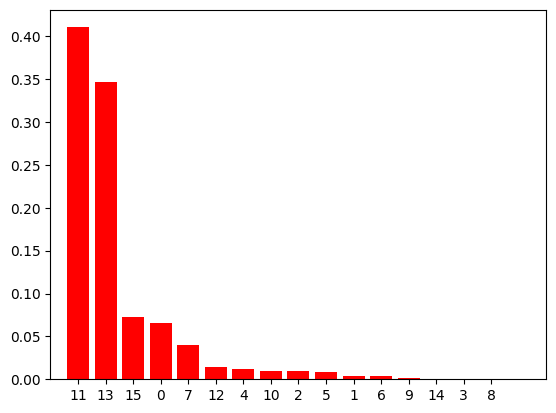

Selected features: [11 13 15  0  7 12  4 10  2  5  1  6  9 14  3  8]


In [26]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

def gbm_feature_selection(X, y):
    # Initialize Gradient Boosting Classifier
    gbm = GradientBoostingClassifier()
    
    # Fit the model
    gbm.fit(X, y)
    
    # Get feature importances
    feature_importances = gbm.feature_importances_
    
    # Sort feature importances in descending order
    indices = np.argsort(feature_importances)[::-1]
    
    # Print feature ranking
    print("Feature ranking:")
    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importances[indices[f]]))
    
    # Plot feature importances
    plt.figure()
#     plt.title("Feature importances")
    plt.bar(range(X.shape[1]), feature_importances[indices], color="r", align="center")
    plt.xticks(range(X.shape[1]), indices)
    
    # Zoom in on the first 10 features
    plt.xlim(-1, 17)  # Adjust the limit as needed
    
    plt.show()
    
    # Return indices of selected features based on importance
    return indices

# Example usage:
# Assuming df_new is your feature DataFrame and df_tbi1['d_kl_tl'] is your target variable.

# Apply GBM feature selection
selected_features = gbm_feature_selection(X, y)

# Print the selected features
print("Selected features:", selected_features)


In [24]:
selected_columns = ["CRS-R (t2)", "ERBI B (t2)", "DRS (t2)", "Age", "Marshall (t0)"]  # Replace with the names of the columns you want to select
# Select the columns
df_select = df_tbi4[selected_columns]
df_select.head()

,CRS-R (t2),ERBI B (t2),DRS (t2),Age,Marshall (t0)
0,NaN,NaN,30.0,76,5
1,23.0,60.0,8.0,28,3
2,23.0,70.0,6.0,20,2
3,23.0,100.0,3.0,22,2
4,23.0,90.0,10.0,62,2
